In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import klib as k
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydataset import data

In [3]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [4]:
df = data('cake')
df.head()

,replicate,recipe,temperature,angle,temp
1,1,A,175,42,175
2,1,A,185,46,185
3,1,A,195,47,195
4,1,A,205,39,205
5,1,A,215,53,215


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   replicate    270 non-null    int64 
 1   recipe       270 non-null    object
 2   temperature  270 non-null    int64 
 3   angle        270 non-null    int64 
 4   temp         270 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 12.7+ KB


In [6]:
x = df[['angle']].values
x

array([[42],
       [46],
       [47],
       [39],
       [53],
       [42],
       [39],
       [46],
       [51],
       [49],
       [55],
       [42],
       [46],
       [44],
       [45],
       [46],
       [48],
       [63],
       [47],
       [29],
       [35],
       [47],
       [57],
       [45],
       [35],
       [46],
       [47],
       [39],
       [52],
       [61],
       [43],
       [43],
       [43],
       [46],
       [47],
       [58],
       [32],
       [32],
       [37],
       [43],
       [45],
       [45],
       [34],
       [30],
       [42],
       [35],
       [42],
       [35],
       [33],
       [24],
       [40],
       [37],
       [41],
       [38],
       [26],
       [32],
       [35],
       [24],
       [39],
       [26],
       [25],
       [26],
       [28],
       [46],
       [37],
       [37],
       [38],
       [41],
       [38],
       [30],
       [36],
       [35],
       [28],
       [30],
       [31],
       [37],
       [41],

In [7]:
y = df[['temperature']].values

In [8]:
sc = StandardScaler()

In [9]:
x = sc.fit_transform(x)
x

array([[ 1.20499982],
       [ 1.69296375],
       [ 1.81495474],
       [ 0.83902687],
       [ 2.54690063],
       [ 1.20499982],
       [ 0.83902687],
       [ 1.69296375],
       [ 2.30291867],
       [ 2.0589367 ],
       [ 2.7908826 ],
       [ 1.20499982],
       [ 1.69296375],
       [ 1.44898179],
       [ 1.57097277],
       [ 1.69296375],
       [ 1.93694572],
       [ 3.76681046],
       [ 1.81495474],
       [-0.38088296],
       [ 0.35106294],
       [ 1.81495474],
       [ 3.03486457],
       [ 1.57097277],
       [ 0.35106294],
       [ 1.69296375],
       [ 1.81495474],
       [ 0.83902687],
       [ 2.42490965],
       [ 3.5228285 ],
       [ 1.3269908 ],
       [ 1.3269908 ],
       [ 1.3269908 ],
       [ 1.69296375],
       [ 1.81495474],
       [ 3.15685555],
       [-0.01491001],
       [-0.01491001],
       [ 0.59504491],
       [ 1.3269908 ],
       [ 1.57097277],
       [ 1.57097277],
       [ 0.22907196],
       [-0.25889197],
       [ 1.20499982],
       [ 0

In [10]:
y

array([[175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
       [225],
       [175],
       [185],
       [195],
       [205],
       [215],
      

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
model = LinearRegression()

In [13]:
# Fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [14]:
# coeff
model.coef_

array([[5.91931208]])

In [15]:
# intercept
model.intercept_

array([200.05229303])

In [18]:
# training accurecy
training_score = model.score(x_train, y_train)*100
training_score

12.466580725610699

In [17]:
# testing accurecy
testig_score = model.score(x_test,y_test)*100
testig_score

1.445351651197202

In [19]:
# R2 score
R2_score = r2_score(y_test,model.predict(x_test))*100
R2_score

1.445351651197202

In [20]:
# mean absolute error
mean = mean_absolute_error(y_test,model.predict(x_test))
mean

12.687587752025372

In [23]:
# Mean squered error
mse = mean_squared_error(y_test,model.predict(x_test))
mse

224.55318368636694

In [25]:
# Predicting values
y_predict = model.predict(x)
y_predict

array([[207.18506303],
       [210.07347382],
       [210.79557652],
       [205.01875493],
       [215.12819271],
       [207.18506303],
       [205.01875493],
       [210.07347382],
       [213.68398732],
       [212.23978192],
       [216.57239811],
       [207.18506303],
       [210.07347382],
       [208.62926842],
       [209.35137112],
       [210.07347382],
       [211.51767922],
       [222.3492197 ],
       [210.79557652],
       [197.79772794],
       [202.13034413],
       [210.79557652],
       [218.01660351],
       [209.35137112],
       [202.13034413],
       [210.07347382],
       [210.79557652],
       [205.01875493],
       [214.40609001],
       [220.9050143 ],
       [207.90716572],
       [207.90716572],
       [207.90716572],
       [210.07347382],
       [210.79557652],
       [218.73870621],
       [199.96403604],
       [199.96403604],
       [203.57454953],
       [207.90716572],
       [209.35137112],
       [209.35137112],
       [201.40824144],
       [198

In [30]:
output = pd.DataFrame(zip(y,y_predict), columns=("ACTUAL","PREDICTED"),dtype=float)
output.head()

,ACTUAL,PREDICTED
0,175.0,207.185063
1,185.0,210.073474
2,195.0,210.795577
3,205.0,205.018755
4,215.0,215.128193


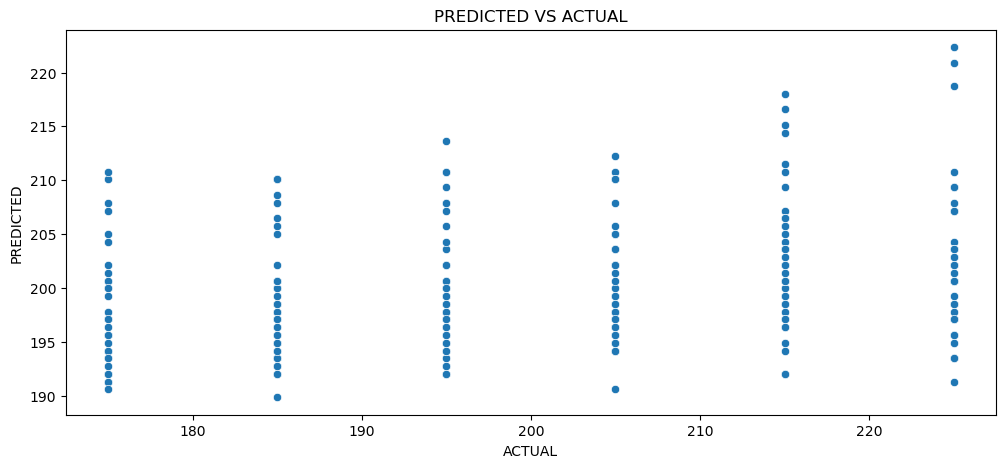

In [32]:
# visualising the output
plt.figure(figsize=(12,5))
plt.title("PREDICTED VS ACTUAL")
plt.xticks()
sns.scatterplot(data=output, x="ACTUAL", y="PREDICTED");

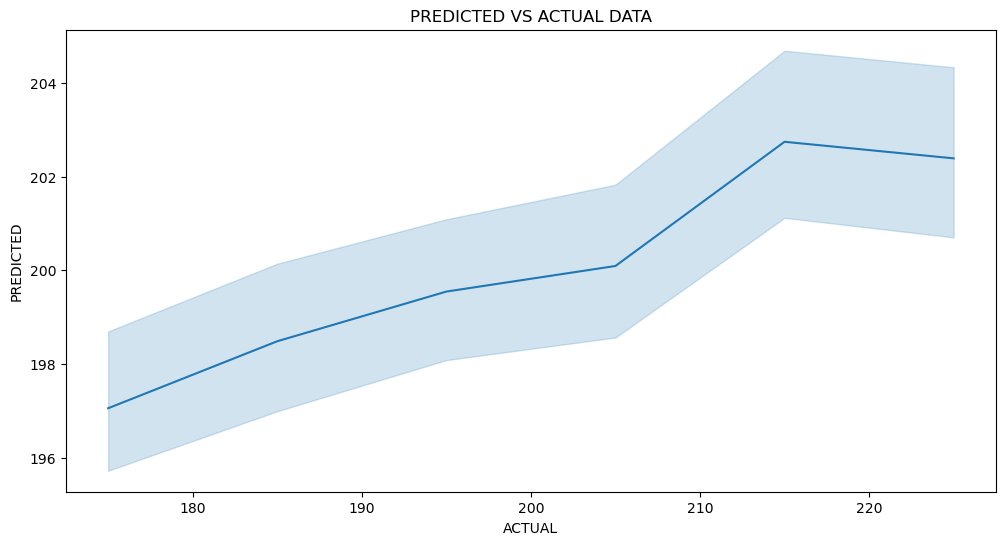

In [35]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=output, x="ACTUAL",y="PREDICTED");